In [1]:
import netket as nk
import numpy as np

from model import LogSlaterDeterminant, LogFullNeuralBackflow, CombinedModel
from hamiltonian.hubbard import Hubbard, Hubbard_extend

/opt/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
t = 1.0
U = 0.0
N_f = 5

Lx = 4
Ly = 4

In [5]:
hi, H, graph = Hubbard(t, U, [Lx, Ly], [False, True], (N_f, N_f))
exchange_graph = nk.graph.disjoint_union(graph, graph)

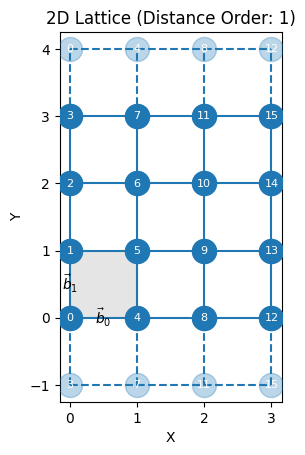

<Axes: title={'center': '2D Lattice (Distance Order: 1)'}, xlabel='X', ylabel='Y'>

In [6]:
graph.draw()

In [9]:
rule = nk.sampler.rules.FermionHopRule(hi, graph=exchange_graph)
sa =  nk.sampler.MetropolisExchange(
    hi, graph=graph, n_chains=16, sweep_size=64, dtype=np.int8)

/tmp/ipykernel_293650/1154091128.py:2: UserWarning: Using MetropolisExchange with SpinOrbitalFermions can yield unintended behavior.Note that MetropolisExchange only exchanges fermions according to the graph edges and might not hop fermions of all the spin sectors (see `nk.samplers.rule.FermionHopRule`). We recommend using MetropolisFermionHop.
  sa =  nk.sampler.MetropolisExchange(


In [11]:
model = LogFullNeuralBackflow.LogFullNeuralBackflow(hi, param_dtype=complex, hidden_units=16)

In [ ]:
op = nk.optimizer.Sgd(learning_rate=0.01)
vstate = nk.vqs.MCState(sa, model, n_samples=512, n_discard_per_chain=16)
preconditioner = nk.optimizer.SR(diag_shift=0.05, holomorphic=True)

gs = nk.VMC(H, op, variational_state=vstate, preconditioner=preconditioner)

In [10]:
sa

MetropolisSampler(
  hilbert = SpinOrbitalFermions(n_orbitals=16, s=1/2, n_fermions=10, n_fermions_per_spin=(5, 5)),
  rule = ExchangeRule(# of clusters: 32),
  n_chains = 16,
  sweep_size = 64,
  reset_chains = False,
  machine_power = 2,
  dtype = <class 'numpy.int8'>)